In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_digits(return_X_y=True)

In [3]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [4]:
X.shape

(1797, 64)

0


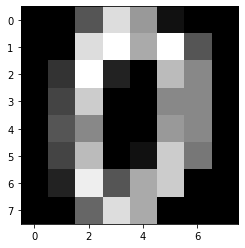

In [5]:
print(y[0])
plt.imshow(np.reshape(X[0, :], (8, 8)), cmap='gray');

5


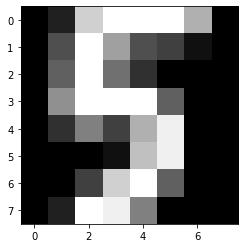

In [6]:
print(y[32])
plt.imshow(np.reshape(X[32, :], (8, 8)), cmap='gray');

9


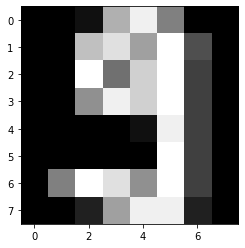

In [7]:
print(y[128])
plt.imshow(np.reshape(X[128, :], (8, 8)), cmap='gray');

In [8]:
for i in range(10):
    print('There are {} instants for class {}'.format(np.sum(y==i), i))

There are 178 instants for class 0
There are 182 instants for class 1
There are 177 instants for class 2
There are 183 instants for class 3
There are 181 instants for class 4
There are 182 instants for class 5
There are 181 instants for class 6
There are 179 instants for class 7
There are 174 instants for class 8
There are 180 instants for class 9


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

# Mean distance

In [12]:
centers = {}

for i in range(10):
    centers[i] = X_train[y_train==i].mean(axis=0)

In [13]:
centers

{0: array([ 0.        ,  0.        ,  4.36585366, 13.11382114, 11.16260163,
         2.77235772,  0.01626016,  0.        ,  0.        ,  0.79674797,
        12.5203252 , 13.40650407, 11.56910569, 11.24390244,  0.89430894,
         0.        ,  0.        ,  3.66666667, 14.34146341,  5.11382114,
         2.2601626 , 12.19512195,  3.30894309,  0.        ,  0.        ,
         5.23577236, 12.86178862,  2.08943089,  0.10569106,  8.98373984,
         6.54471545,  0.        ,  0.        ,  6.06504065, 11.64227642,
         1.02439024,  0.06504065,  8.7398374 ,  7.33333333,  0.        ,
         0.        ,  3.69918699, 13.18699187,  1.78861789,  1.6097561 ,
        11.16260163,  6.13821138,  0.        ,  0.        ,  0.87804878,
        13.33333333, 10.        , 10.39837398, 13.28455285,  2.56910569,
         0.        ,  0.        ,  0.        ,  4.39837398, 13.56097561,
        13.28455285,  5.63414634,  0.30894309,  0.        ]),
 1: array([0.00000000e+00, 7.40740741e-03, 2.42222222e+00, 

In [14]:
y_pred = np.array([], dtype=np.int64)

for n in range(X_test.shape[0]):
    label = -1
    min_dist = np.inf
    for i in range(10):
        d = np.linalg.norm(X_test[n, :] - centers[i])
        if d < min_dist:
            min_dist = d
            label = i
            
    y_pred = np.append(y_pred, label)

In [15]:
ACC = 100 * np.sum(y_pred == y_test)/y_test.shape[0]
print('accurary is: {}'.format(ACC))

accurary is: 89.55555555555556


# SVD

In [16]:
vec_img = {}

for i in range(10):
    vec_img[i] = X_train.T[:, y_train==i]

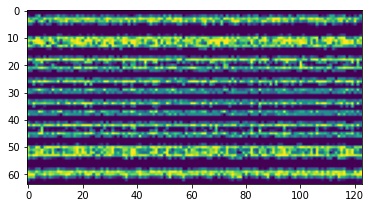

In [17]:
plt.imshow(vec_img[0]);

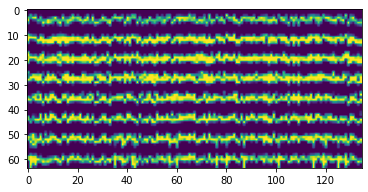

In [18]:
plt.imshow(vec_img[1]);

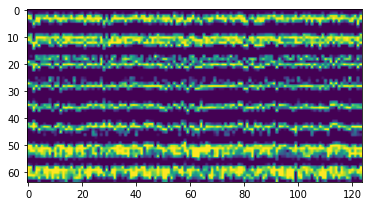

In [19]:
plt.imshow(vec_img[2]);

In [49]:
def SVD_classifier(img_classes, z, k=10):
    min_res = np.infty
    lable = -1
    for i in range(10):
        U, S, Vt = np.linalg.svd(img_classes[i])

        res = np.linalg.norm((np.eye(U.shape[0]) - U[:, :k] @ U[:, :k].T) @ z)
        
        if res < min_res:
            min_res = res
            label = i
            
    return label

In [61]:
def get_acc(y_test, y_pred):
    return 100*np.sum(np.asarray(y_pred) == y_test)/y_test.shape[0]

In [63]:
K_list = []
ACC = []
for K in range(2, 31, 3):
    y_pred = []
    for i in range(y_test.shape[0]):
        y_pred.append(SVD_classifier(vec_img, X_test[i,: ], k=K))
        
    K_list.append(K)
    ACC.append(get_acc(y_test, y_pred))
    print(K, ACC[-1])

2 93.11111111111111
5 97.11111111111111
8 98.44444444444444
11 98.88888888888889
14 99.33333333333333
17 99.11111111111111
20 99.33333333333333
23 98.66666666666667
26 97.55555555555556
29 97.11111111111111


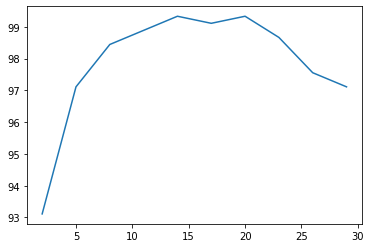

In [64]:
plt.plot(K_list, ACC)